In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
alpha = [.6, .3, .1]

In [65]:
res = np.random.dirichlet(alpha, size=100000)

In [66]:
np.sum(res>0.95)

28047

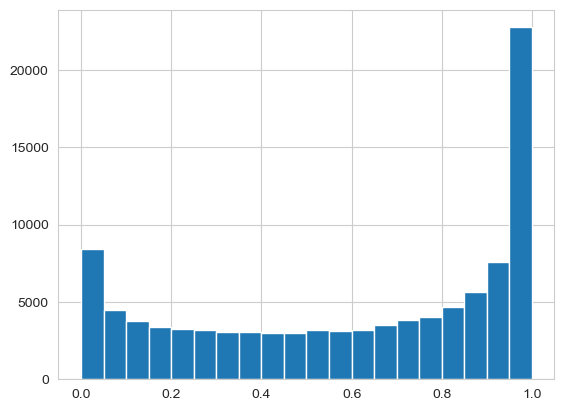

In [67]:
plt.hist(res[:,0], bins=20)
plt.show()

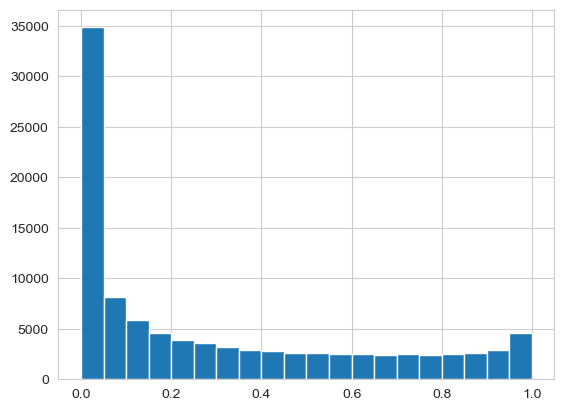

In [68]:
plt.hist(res[:,1], bins=20)
plt.show()

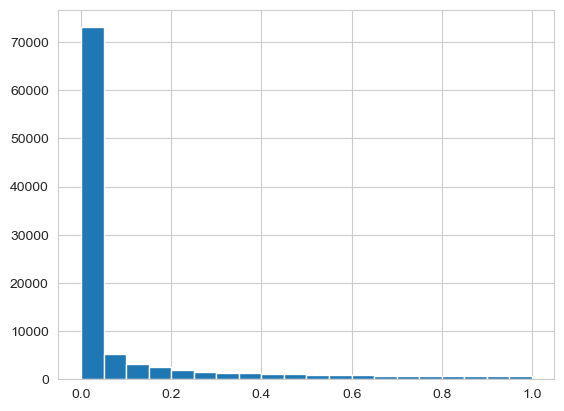

In [69]:
plt.hist(res[:,2], bins=20)
plt.show()

# Tests 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
corners_c = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5], [0, 0]])

In [3]:
def bc2xy(bc):
    return(np.sum(bc*corners[:,0]), np.sum(bc*corners[:,1]))

In [4]:
alpha = [.6, .3, .1]
res = np.random.dirichlet(alpha, size=1000)

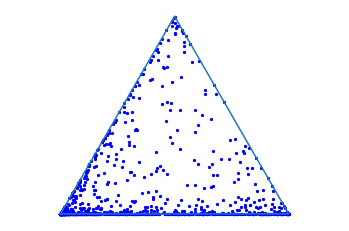

In [125]:
plt.plot(corners_c[:,0], corners_c[:,1])
for point in res:
    x,y = bc2xy(point)
    plt.scatter(x, y, c='blue', s=5)
plt.axis('equal')
plt.axis('off')
plt.show()

In [126]:
res_xy = np.array([bc2xy(point) for point in res])
model = KernelDensity(kernel='gaussian').fit(res_xy)

In [129]:
trimesh = refiner.refine_triangulation(subdiv=7)
grid = np.array([xy for xy in zip(trimesh.x, trimesh.y)])
probas = np.exp(model.score_samples(grid))

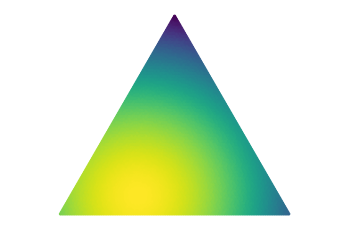

In [130]:
trimesh = refiner.refine_triangulation(subdiv=7)
grid = np.array([xy for xy in zip(trimesh.x, trimesh.y)])
plt.scatter(grid[:,0], grid[:,1], c=probas, s=5)
plt.axis('equal')
plt.axis('off')
plt.show()

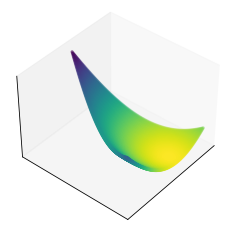

In [131]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(grid[:,0], grid[:,1], probas, c=probas, s=5)
ax.view_init(elev=320., azim=320.)
#plt.axis('equal')
#plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()

In [5]:
alpha = [.6, .3, .1]
res = np.random.dirichlet(alpha, size=10000)
res_xy_1 = np.array([bc2xy(point) for point in res])

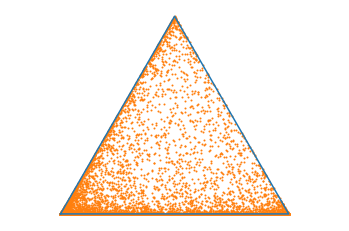

In [6]:
plt.plot(corners_c[:,0], corners_c[:,1])
plt.scatter(res_xy_1[:,0], res_xy_1[:,1], c='tab:orange', s=1)
plt.axis('equal')
plt.axis('off')
plt.show()

In [8]:
model = KernelDensity(kernel='gaussian').fit(res_xy_1)

In [9]:
alpha = [6, 3, 1]
res = np.random.dirichlet(alpha, size=10000)
res_xy_10 = np.array([bc2xy(point) for point in res])

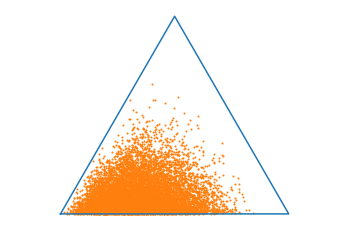

In [10]:
plt.plot(corners_c[:,0], corners_c[:,1])
plt.scatter(res_xy_10[:,0], res_xy_10[:,1], c='tab:orange', s=1)
plt.axis('equal')
plt.axis('off')
plt.show()

In [ ]:
model = KernelDensity(kernel='gaussian').fit(res_xy_10)

In [11]:
alpha = [60, 30, 10]
res = np.random.dirichlet(alpha, size=10000)
res_xy_100 = np.array([bc2xy(point) for point in res])

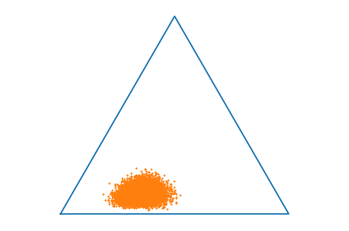

In [12]:
plt.plot(corners_c[:,0], corners_c[:,1])
plt.scatter(res_xy_100[:,0], res_xy_100[:,1], c='tab:orange', s=1)
plt.axis('equal')
plt.axis('off')
plt.show()

In [ ]:
model = KernelDensity(kernel='gaussian').fit(res_xy_100)

In [13]:
alpha = [1/3, 1/3, 1/3]
res = np.random.dirichlet(alpha, size=10000)
res_2_xy_1 = np.array([bc2xy(point) for point in res])

alpha = [10/3, 10/3, 10/3]
res = np.random.dirichlet(alpha, size=10000)
res_2_xy_10 = np.array([bc2xy(point) for point in res])


alpha = [100/3, 100/3, 100/3]
res = np.random.dirichlet(alpha, size=10000)
res_2_xy_100 = np.array([bc2xy(point) for point in res])

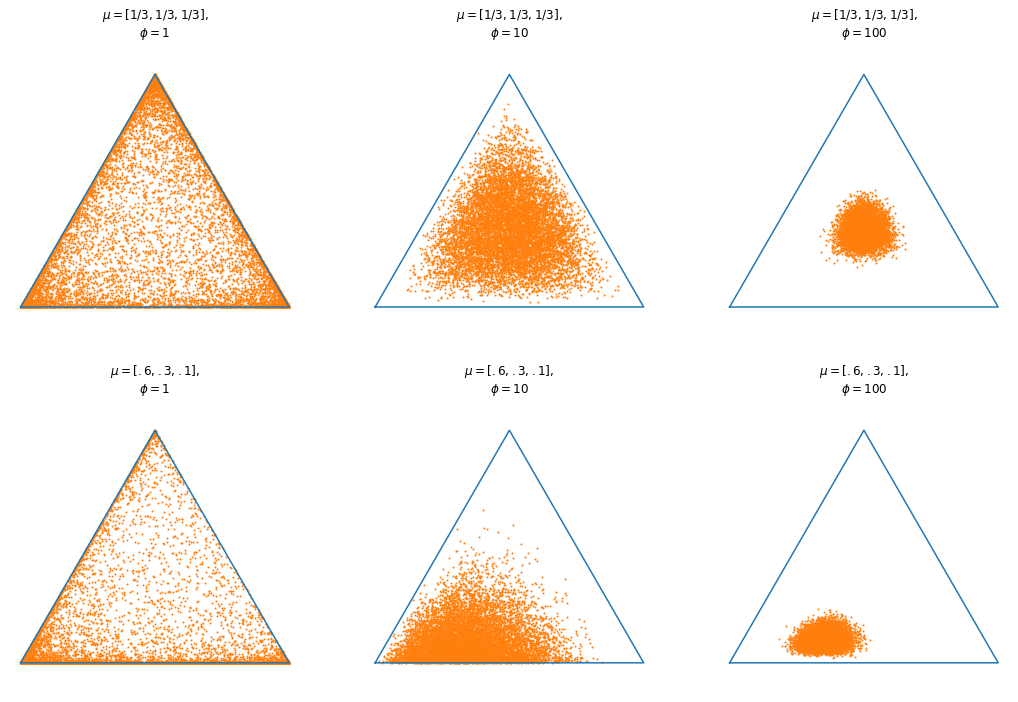

In [15]:
fig, ax = plt.subplots(2, 3,figsize=(18,12))

ax[0,0].plot(corners_c[:,0], corners_c[:,1])
ax[0,0].scatter(res_2_xy_1[:,0], res_2_xy_1[:,1], c='tab:orange', s=1)
ax[0,0].set_title('$\mu = [1/3, 1/3, 1/3],$\n$\phi = 1$')
ax[0,1].plot(corners_c[:,0], corners_c[:,1])
ax[0,1].scatter(res_2_xy_10[:,0], res_2_xy_10[:,1], c='tab:orange', s=1)
ax[0,1].set_title('$\mu = [1/3, 1/3, 1/3],$\n$\phi = 10$')
ax[0,2].plot(corners_c[:,0], corners_c[:,1])
ax[0,2].scatter(res_2_xy_100[:,0], res_2_xy_100[:,1], c='tab:orange', s=1)
ax[0,2].set_title('$\mu = [1/3, 1/3, 1/3],$\n$\phi = 100$')

ax[1,0].plot(corners_c[:,0], corners_c[:,1])
ax[1,0].scatter(res_xy_1[:,0], res_xy_1[:,1], c='tab:orange', s=1)
ax[1,0].set_title('$\mu = [.6, .3, .1],$\n$\phi = 1$')
ax[1,1].plot(corners_c[:,0], corners_c[:,1])
ax[1,1].scatter(res_xy_10[:,0], res_xy_10[:,1], c='tab:orange', s=1)
ax[1,1].set_title('$\mu = [.6, .3, .1],$\n$\phi = 10$')
ax[1,2].plot(corners_c[:,0], corners_c[:,1])
ax[1,2].scatter(res_xy_100[:,0], res_xy_100[:,1], c='tab:orange', s=1)
ax[1,2].set_title('$\mu = [.6, .3, .1],$\n$\phi = 100$')

for aaax in ax:
    for aax in aaax:
        aax.axis('off')
        aax.axis('equal')

plt.savefig('Dirichlet phi.png', bbox_inches='tight', dpi=200)
plt.show()